In [270]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as confusion_matrix

In [271]:
df =pd.read_csv('data/deepslice_data.csv',index_col=0)
df.T

1           2           3           4      \
Use Case              Smartphone  Smartphone  Smartphone  Smartphone   
LTE/5g Category                1           1           1           1   
Technology Supported      LTE/5G      LTE/5G      LTE/5G      LTE/5G   
Day                       sunday      sunday      sunday      sunday   
Time                           1           2           3           4   
GBR                      Non-GBR     Non-GBR     Non-GBR     Non-GBR   
Packet Loss Rate            0.01        0.01        0.01        0.01   
Packet delay                 100         100         100         100   
slice Type                  eMBB        eMBB        eMBB        eMBB   

                           5           6           7           8      \
Use Case              Smartphone  Smartphone  Smartphone  Smartphone   
LTE/5g Category                1           1           1           1   
Technology Supported      LTE/5G      LTE/5G      LTE/5G      LTE/5G   
Day                       sunday      sunday      sunday      sunday   
Time                           5           6           7           8   
GBR                      Non-GBR     Non-GBR     Non-GBR     Non-GBR   
Packet Loss Rate            0.01        0.01        0.01        0.01   
Packet delay                 100         100         100         100   
slice Type                  eMBB        eMBB        eMBB        eMBB   

                           9           10     ...                 63158  \
Use Case              Smartphone  Smartphone  ...  Smart Transportation   
LTE/5g Category                1           1  ...                    22   
Technology Supported      LTE/5G      LTE/5G  ...    IoT(LTE-M, NB-IoT)   
Day                       sunday      sunday  ...              saturday   
Time                           9          10  ...                    14   
GBR                      Non-GBR     Non-GBR  ...               Non-GBR   
Packet Loss Rate            0.01        0.01  ...              0.000001   
Packet delay                 100         100  ...                    10   
slice Type                  eMBB        eMBB  ...                 URLLC   

                                     63159                 63160  \
Use Case              Smart Transportation  Smart Transportation   
LTE/5g Category                         22                    22   
Technology Supported    IoT(LTE-M, NB-IoT)    IoT(LTE-M, NB-IoT)   
Day                               saturday              saturday   
Time                                    15                    16   
GBR                                Non-GBR               Non-GBR   
Packet Loss Rate                  0.000001              0.000001   
Packet delay                            10                    10   
slice Type                           URLLC                 URLLC   

                                     63161                 63162  \
Use Case              Smart Transportation  Smart Transportation   
LTE/5g Category                         22                    22   
Technology Supported    IoT(LTE-M, NB-IoT)    IoT(LTE-M, NB-IoT)   
Day                               saturday              saturday   
Time                                    17                    18   
GBR                                Non-GBR               Non-GBR   
Packet Loss Rate                  0.000001              0.000001   
Packet delay                            10                    10   
slice Type                           URLLC                 URLLC   

                                     63163                 63164  \
Use Case              Smart Transportation  Smart Transportation   
LTE/5g Category                         22                    22   
Technology Supported    IoT(LTE-M, NB-IoT)    IoT(LTE-M, NB-IoT)   
Day                               saturday              saturday   
Time                                    19                    20   
GBR                                Non-GBR               Non-GBR

In [272]:
df.columns =df.columns.str.lower().str.replace(" ","_")

def load_period(t):
    if 8 <= t <= 11 or 18 <= t <= 23:
        return "peak"
    elif 0 <= t <= 6:
        return "night"
    else:
        return "off-peak"

df['network_load'] = df['time'].apply(load_period)
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['packet_loss_rate'],
    y=df['slice_type'],
    alpha=0.3
)
plt.xscale('log')
plt.title('Packet Loss Rate vs Slice Type')
plt.show()

df=df.drop('lte/5g_category',axis=1)
df=df.drop('time',axis=1)
#df=df.drop('packet_loss_rate',axis=1)
#df=df.drop('packet_delay',axis=1)

numeric_column_names =list(df.select_dtypes(include=['int64', 'float64']).columns)
for col in numeric_column_names:
    print(df[col].describe())
    if(df[col].isna().sum()>0):
        print(col, "has missing values")
        df[col] =df[col].fillna(df[col].mean())
categorical_column_names = list(df.select_dtypes(include ='object').columns)
for col in categorical_column_names:
    print(col,"  ",df[col].unique())
    df[col] = df[col].str.lower().str.replace(" ","_")
df.head().T

KeyboardInterrupt: 

Let's check if the dataset is balanced across slice types.

In [ ]:
class_imbalance_ratio = df.slice_type.value_counts().max()/df.slice_type.value_counts().min()
print("Class Imbalance Ratio :", class_imbalance_ratio)  

Class Imbalance Ratio : 2.272659632034632


Null check on columns - done . There are no null values in the dataset.
There are no duplicated values in the dataset.

slice_type
URLLC                 [1e-06]
eMBB     [0.01, 1e-06, 0.001]
mMTC            [0.01, 0.001]
Name: packet_loss_rate, dtype: object
slice_type
URLLC    [1]
eMBB     [1]
mMTC     [1]
Name: packet_delay, dtype: object


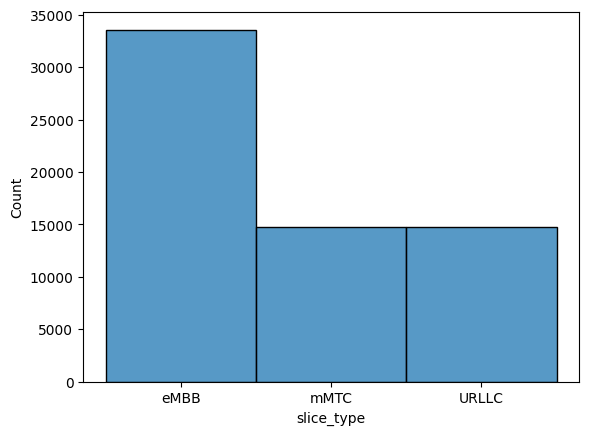

In [280]:

sns.histplot(df.slice_type)
import numpy as np
import pandas as pd

def noise(feature_name,embb_noise,mmtc_noise,urllc_noise):

# Define noise levels for each slice_type
    noise_levels = {
        'embb': embb_noise,
        'mmtc': mmtc_noise,
        'urllc': urllc_noise
        }

    # Add noise slice-wise
    for slice_name, scale in noise_levels.items():
        # Boolean mask for this slice
        mask = df['slice_type'] == slice_name
        
        # Number of rows in this slice
        num_rows = mask.sum()
        
        # Generate Gaussian noise of appropriate size
        noise = np.random.normal(loc=0, scale=scale, size=num_rows)
        
        # Add noise to the noisy column
        df.loc[mask, feature_name] += noise

    # Clip values to remain between 0 and 1
    df[feature_name] = df[feature_name].clip(0, 1)
    print(df.groupby('slice_type')[feature_name].unique())
noise('packet_loss_rate',0.01,0.01,0.005)
noise('packet_delay',0.5,0.5,0.3)


Let's split the dataset into training and testing sets.

In [ ]:
df_fulltrain , df_test= train_test_split(df,test_size=0.2,stratify=df.slice_type, random_state=42)
df_train,df_val=train_test_split(df_fulltrain,test_size=0.25,stratify=df_fulltrain.slice_type,random_state=42)
df_fulltrain = df_fulltrain.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)  
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

y_fulltrain = df_fulltrain['slice_type'].values
y_train = df_train['slice_type'].values
y_val = df_val['slice_type'].values
y_test = df_test['slice_type'].values

print(df["slice_type"].value_counts(normalize=True))
print(df_train["slice_type"].value_counts(normalize=True))
print(df_val["slice_type"].value_counts(normalize=True))
print(df_test["slice_type"].value_counts(normalize=True))


del df_train['slice_type']
del df_val['slice_type']
del df_test['slice_type']


(37899, 8)
(12634, 8)
(12634, 8)
slice_type
embb     0.531907
mmtc     0.234046
urllc    0.234046
Name: proportion, dtype: float64
slice_type
embb     0.531914
mmtc     0.234043
urllc    0.234043
Name: proportion, dtype: float64
slice_type
embb     0.531898
mmtc     0.234051
urllc    0.234051
Name: proportion, dtype: float64
slice_type
embb     0.531898
urllc    0.234051
mmtc     0.234051
Name: proportion, dtype: float64


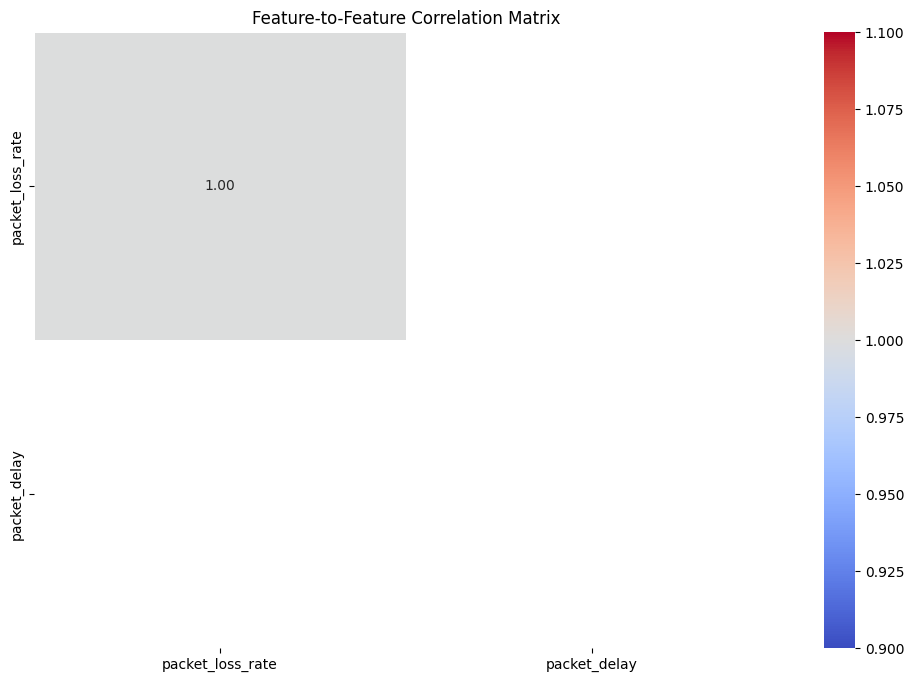

In [ ]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[numeric_column_names].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature-to-Feature Correlation Matrix")
plt.show()

latency_score and reliability_score have 0.54 correlation coefficient. As latency score increases (lower delay), reliability score tends to increase (lower packet loss).

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("vectorizer", DictVectorizer(sparse=False)),
    ("scaler", StandardScaler()),  
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])



y=y_train

x=df_train.to_dict(orient="records")
print("x values are ",x)
pipeline.fit(x, y)
x_val =df_val.to_dict(orient="records")
y_pred_val = pipeline.predict(x_val)
y_pred_proba_val = pipeline.predict_proba(x_val)

x_test=df_test.to_dict(orient="records")
y_pred_test=pipeline.predict(x_test)
y_pred_proba_test=pipeline.predict_proba(x_test)

print(classification_report(y_val, y_pred_val))
print("*******************************************************")
cm = confusion_matrix(y_val,y_pred_val)
#print("actual y values ",y_pred_proba_val)
print(cm)
print("confusion matrix for validation dataset")
print(classification_report(y_test, y_pred_test))
roc_auc_score(y_val, y_pred_proba_val,multi_class="ovr")
roc_auc_score(y_test,y_pred_proba_test,multi_class="ovr") 


x values are  [{'use_case': 'smart_city_&_home', 'technology_supported': 'iot(lte-m,_nb-iot)', 'day': 'friday', 'gbr': 'non-gbr', 'packet_loss_rate': 0.010163688167939737, 'packet_delay': 1.0, 'network_load': 'off-peak'}, {'use_case': 'ar/vr/gaming', 'technology_supported': 'lte/5g', 'day': 'sunday', 'gbr': 'gbr', 'packet_loss_rate': 0.00097798486366859, 'packet_delay': 1.0, 'network_load': 'off-peak'}, {'use_case': 'smartphone', 'technology_supported': 'lte/5g', 'day': 'monday', 'gbr': 'gbr', 'packet_loss_rate': 0.0009225731679084442, 'packet_delay': 1.0, 'network_load': 'night'}, {'use_case': 'smartphone', 'technology_supported': 'lte/5g', 'day': 'sunday', 'gbr': 'non-gbr', 'packet_loss_rate': 0.009420616948977958, 'packet_delay': 1.0, 'network_load': 'night'}, {'use_case': 'smartphone', 'technology_supported': 'lte/5g', 'day': 'sunday', 'gbr': 'non-gbr', 'packet_loss_rate': 0.010306287216756279, 'packet_delay': 1.0, 'network_load': 'night'}, {'use_case': 'smartphone', 'technology_su

KeyboardInterrupt: 

Let's do feature engineering from raw data as the model is deterministic .
reliability_score is -log10 of packet_loss_rate 
If packet_loss_rate is 0.001 , then reliability will be 3. The more the packet loss , less will be reliability score 
packet_loss_rate	reliability_score	Interpretation
0.01	            2	                Low reliability
0.001	            3	                Medium
0.000001	        6	                Very high reliability

In [ ]:
df.groupby('slice_type').nunique()


use_case  technology_supported  day  gbr  packet_loss_rate  \
slice_type                                                               
embb               2                     1    7    2             26654   
mmtc               3                     1    7    2             14176   
urllc              4                     1    7    1              7436   

            packet_delay  network_load  
slice_type                              
embb                   1             3  
mmtc                   1             3  
urllc                  1             3